In [1]:
from manim import *


Manim Community v0.17.3

In [79]:
# Polar Night
nord_darkest_black = rgb_to_color(hex_to_rgb("#2E3440"))
nord_dark_black = rgb_to_color(hex_to_rgb("#3B4252"))
nord_black = rgb_to_color(hex_to_rgb("#434C5E"))
nord_light_black = rgb_to_color(hex_to_rgb("#4C566A"))
nord_lightest_black = rgb_to_color(hex_to_rgb("#4C566A"))

# Snow Storm
nord_dark_white = rgb_to_color(hex_to_rgb("#D8DEE9"))
nord_white = rgb_to_color(hex_to_rgb("#E5E9F0"))
nord_light_white = rgb_to_color(hex_to_rgb("#ECEFF4"))

# Frost
nord_turquoise = rgb_to_color(hex_to_rgb("#8FBCBB"))
nord_cyan = rgb_to_color(hex_to_rgb("#88C0D0"))
nord_blue = rgb_to_color(hex_to_rgb("#81A1C1"))
nord_dark_blue = rgb_to_color(hex_to_rgb("#5E81AC"))

# Aurora
nord_red = rgb_to_color(hex_to_rgb("#BF616A"))
nord_orange = rgb_to_color(hex_to_rgb("#D08770"))
nord_yellow = rgb_to_color(hex_to_rgb("#EBCB8B"))
nord_green = rgb_to_color(hex_to_rgb("#A3BE8C"))
nord_purple = rgb_to_color(hex_to_rgb("#B48EAD"))


In [3]:
config.background_color = nord_darkest_black
config.media_width = "75%"
config.verbosity = "WARNING"
config.frame_y_radius = 4
config.pixel_height = 1080  #  1080 is default
config.pixel_width = 1080 #  1920 is default
config.resolution = (1080,1080)

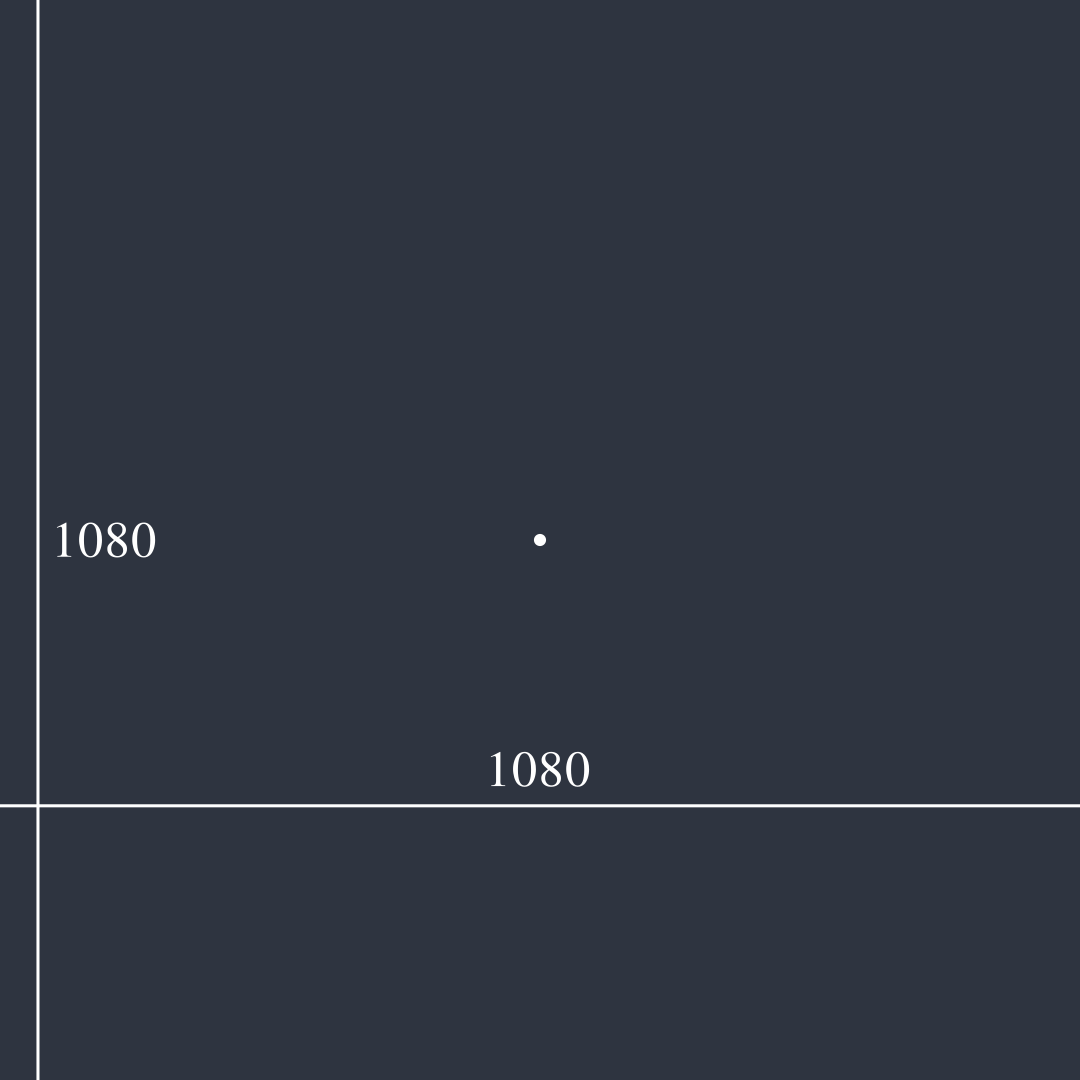

In [4]:
%%manim ShowScreenResolution

class ShowScreenResolution(Scene):
    def construct(self):
        

        pixel_height = config["pixel_height"]  #  1080 is default
        pixel_width = config["pixel_width"]  # 1920 is default
        frame_width = pixel_width
        frame_height = pixel_height
        

        self.add(Dot())
        d1 = Line(frame_width * LEFT / 2, frame_width * RIGHT / 2).to_edge(DOWN)
        self.add(d1)
        self.add(Text(str(pixel_width)).next_to(d1, UP))
        d2 = Line(frame_height * UP / 2, frame_height * DOWN / 2).to_edge(LEFT)
        self.add(d2)
        self.add(Text(str(pixel_height)).next_to(d2, RIGHT))

In [125]:
%%manim CreateCircle

class CreateCircle(Scene):
    def construct(self):
        
        def get_pos(vertical, horizontal):
            return horizontal*RIGHT+vertical*DOWN+LEFT*3.5+UP*3.5

            
        def f_blocks(color=nord_dark_white):
            pairs = [
                (0,6),
                (1,5),
                (2,5),
                (3,5),
                (4,5),
                (5,4),
                (2,6),
            ]
            return [Square(stroke_width=1,side_length=1.0, color=color).set_fill(color, opacity=1).shift(get_pos(v,h)) for v,h in pairs]
        
        def m_blocks(color=nord_lightest_black):
            pairs = [
                (1,0),
                (2,1),
                (3,1),
                (4,1),
                (5,1),
                (2,2),
                (3,3),
                (2,4),
                (3,7),
                (4,7),
                (5,7),
            ]
            return [Square(stroke_width=1,side_length=1.0, color=color).set_fill(color, opacity=1).shift(get_pos(v,h)) for v,h in pairs]

        m_block_list = m_blocks()
        m_square = Square(color=nord_lightest_black).set_fill(nord_lightest_black, opacity=1)
        self.play(DrawBorderThenFill(m_square))

        def reduce_speed(speed=1.0):
            return max(speed-0.1, 0.3819660112501051)
            
        speed = 1
        for m in m_block_list:
            self.play(Transform(m_square,m),run_time=speed)
            self.add(m)
            m_square = m
            speed = reduce_speed(speed)


        f_block_list = f_blocks()
        f_square = Square(color=nord_dark_white).set_fill(nord_dark_white, opacity=1)
        self.play(DrawBorderThenFill(f_square))

        speed = 1
        for f in f_block_list:
            self.play(Transform(f_square,f),run_time=speed)
            self.add(f)
            m_square = f
            speed = reduce_speed(speed)

        self.wait()
        return
#        for obj in lst:
#            self.add(obj)
#        self.play(
#            DrawBorderThenFill(m_square, run_time=1.5),
#            DrawBorderThenFill(m_square, run_time=1.5),
#            DrawBorderThenFill(f_square, run_time=1.5),
#        )
        
        
        

In [12]:
%%manim CircleToSquare

class CircleToSquare(Scene):
    def construct(self):
        blue_circle = Circle(color=BLUE, fill_opacity=0.5)
        green_square = Square(color=GREEN, fill_opacity=0.8)
        self.play(Create(blue_circle))
        self.wait()
        
        self.play(Transform(blue_circle, green_square))
        self.wait()

In [13]:
%%manim SquareAndCircle

class SquareAndCircle(Scene):
    def construct(self):
        circle = Circle()  # create a circle
        circle.set_fill(PINK, opacity=0.5)  # set the color and transparency

        square = Square()  # create a square
        square.set_fill(BLUE, opacity=0.5)  # set the color and transparency

        square.next_to(circle, RIGHT, buff=0.5)  # set the position
        self.play(Create(circle), Create(square))  # show the shapes on screen

In [14]:
%%manim DifferentRotations

class DifferentRotations(Scene):
    def construct(self):
        left_square = Square(color=BLUE, fill_opacity=0.7).shift(2 * LEFT)
        right_square = Square(color=GREEN, fill_opacity=0.7).shift(2 * RIGHT)
        self.play(
            left_square.animate.rotate(PI), Rotate(right_square, angle=PI), run_time=2
        )
        self.wait()

In [15]:
%%manim BraceAnnotation

class BraceAnnotation(Scene):
    def construct(self):

        decimal = DecimalNumber().to_edge(UP)

        dot = Dot([-2, -1, 0], color=nord_dark_white)
        dot2 = Dot([2, 1, 0],color=nord_dark_white)
        line = Line(dot.get_center(), dot2.get_center()).set_color(nord_orange)
#        b1 = Brace(line, color=nord_light_white)
#        b1text = b1.get_text("Horizontal distance")
#        b2 = Brace(line, direction=line.copy().rotate(PI / 2).get_unit_vector(), color=nord_light_black)
#        b2text = b2.get_tex("x-x_1")
#        b3 = Brace(line, direction=line.copy().rotate(1.5*PI).get_unit_vector(), color=nord_green)
        
        b4 = Brace(line, color=nord_orange)
        decimal.add_updater(lambda d: d.set_value(b4.height))

#        self.add(line, dot, dot2, b1, b2, b1text, b2text, b3, decimal)
        self.add(line, dot, dot2, b4, decimal)
        
        self.play(
            Rotate(b4, angle=0.5*PI),
            run_time=4
        )
        
        self.wait()

In [16]:
%%manim HeightExample

class HeightExample(Scene):
    def construct(self):
        decimal = DecimalNumber().to_edge(UP)
        rect = Rectangle(color=BLUE)
        rect_copy = rect.copy().set_stroke(GRAY, opacity=0.5)

        decimal.add_updater(lambda d: d.set_value(rect.height))

        self.add(rect_copy, rect, decimal)
        self.play(rect.animate.set(width=12))
        self.wait()

In [132]:
%%manim CreateCircle

class CreateCircle(Scene):
    def construct(self):
        
        def get_pos(vertical, horizontal):
            return horizontal*RIGHT+vertical*DOWN+LEFT*3.5+UP*3.5

            
        def f_blocks(color=nord_dark_white):
            pairs = [
                (0,6),
                (1,5),
                (2,5),
                (3,5),
                (4,5),
                (5,4),
                (2,6),
            ]
            return [Square(stroke_width=1,side_length=1.0, color=color).set_fill(color, opacity=1).shift(get_pos(v,h)) for v,h in pairs]
        
        def m_blocks(color=nord_lightest_black):
            pairs = [
                (1,0),
                (2,1),
                (3,1),
                (4,1),
                (5,1),
                (2,2),
                (3,3),
                (2,4),
                (3,7),
                (4,7),
                (5,7),
            ]
            return [Square(stroke_width=1,side_length=1.0, color=color).set_fill(color, opacity=1).shift(get_pos(v,h)) for v,h in pairs]

        m_block_list = m_blocks()
        f_block_list = f_blocks()

        m_square = Square(color=nord_lightest_black).set_fill(nord_lightest_black, opacity=1)
        f_square = Square(color=nord_dark_white).set_fill(nord_dark_white, opacity=1).next_to(m_square, direction=RIGHT)
        self.play(DrawBorderThenFill(m_square), DrawBorderThenFill(f_square))

        def reduce_speed(speed=0.7):
            return max(speed-0.1, 0.3)
            
        speed = 0.7
        mf_block_list = zip(m_block_list,f_block_list)
        rest_m_block_list = m_block_list[len(f_block_list):]
        for m,f in mf_block_list:
            self.play(Transform(m_square,m),Transform(f_square,f),run_time=speed)
            self.add(m,f)
            m_square = m
            f_square = f
            speed = reduce_speed(speed)

        for m in rest_m_block_list:
            self.play(Transform(m_square,m),run_time=speed)
            self.add(m)
            m_square = m
            speed = reduce_speed(speed)

        self.wait()
